# MNIST classification problem
 
This notebook builds a Convolutional Neural Network (CNN) to classify grayscale images of handwritten digits (28x28 pixels) into 10 categories: 0 through 9.

The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) is the "Hello World" of machine learning—a classic benchmark assembled by the National Institute of Standards and Technology (NIST) in the 1980s. It includes 60,000 training images and 10,000 test images, each with 784 pixels (28x28).

Keras makes it easy with built-in access to MNIST, automatically splitting it into training and validation sets.

In [1]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as np_utils

import numpy as np
import matplotlib.pyplot as plt


2025-11-12 16:20:58.543332: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# 1D data
x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
x_test = test_images.reshape(test_images.shape[0], 28,28,1)
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
# convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(train_labels, num_classes=10)
y_test = np_utils.to_categorical(test_labels, num_classes=10)

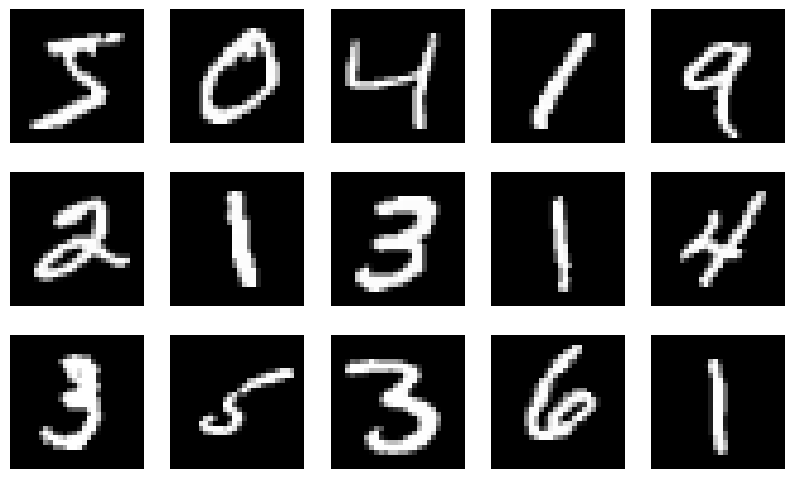

In [5]:
fig = plt.figure(figsize=(10, 6))
rows, cols = 3, 5
for n in range(rows * cols):
    plt.subplot(rows, cols, n+1)
    plt.imshow(train_images[n], cmap='gray')
    plt.axis('off')

# CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D, Conv2D,Dense, Flatten
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10

input_shape = (28,28,1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


2025-11-12 16:21:07.677486: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,578 (209.29 KB)

 Trainable params: 53,578 (209.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
batch_size = 16
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8914 - loss: 0.3559 - val_accuracy: 0.9787 - val_loss: 0.0720
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9678 - loss: 0.1065 - val_accuracy: 0.9848 - val_loss: 0.0538
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9761 - loss: 0.0789 - val_accuracy: 0.9880 - val_loss: 0.0435
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9795 - loss: 0.0658 - val_accuracy: 0.9900 - val_loss: 0.0373
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9806 - loss: 0.0603 - val_accuracy: 0.9893 - val_loss: 0.0386
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9841 - loss: 0.0522 - val_accuracy: 0.9905 - val_loss: 0.0349
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9846 - loss: 0.0489 - val_accuracy: 0.9910 - val_loss: 0.0344
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9858 - loss: 0.0461 - 

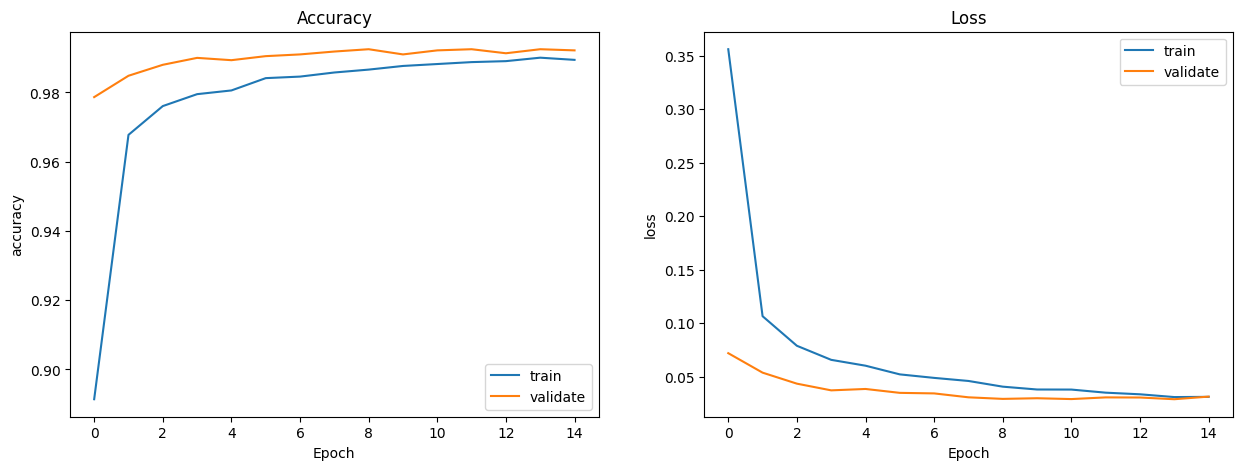

In [9]:
    # get history from the model
    h = model.history.history

    plt.figure(figsize=(15, 5))

    # accuracy plot
    plt.subplot(121)
    plt.title("Accuracy")
    plt.plot(h['accuracy'], label="train")
    plt.plot(h['val_accuracy'], label="validate")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.legend()

    # loss plot
    plt.subplot(122)
    plt.title("Loss")
    plt.plot(h['loss'], label="train")
    plt.plot(h['val_loss'], label="validate")
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.legend()

    plt.show()

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test,verbose=0)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

Test accuracy 0.991599977016449
Test loss 0.026838848367333412


Try to remove the Dropout layer and comment the behaviour of the training/validation loss and accuracy

Try to achieve the best accuracy using only 2 epochs

Try to use the fashion mnist dataset https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data and try to achieve a best accuracy